In [1]:
%matplotlib inline
import sys
sys.path.append('../../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tools import open_file, dataframe, ohlc_chart

In [5]:
raw_file = open_file('h5py', 'custom/ohlc_trend(20).h5', mode='r')

In [6]:
df = dataframe('GC',raw_file)

In [7]:
df['signal'] = df.trend.rolling(3).mean()

(960.92499999999995, 2026.0260000000001)

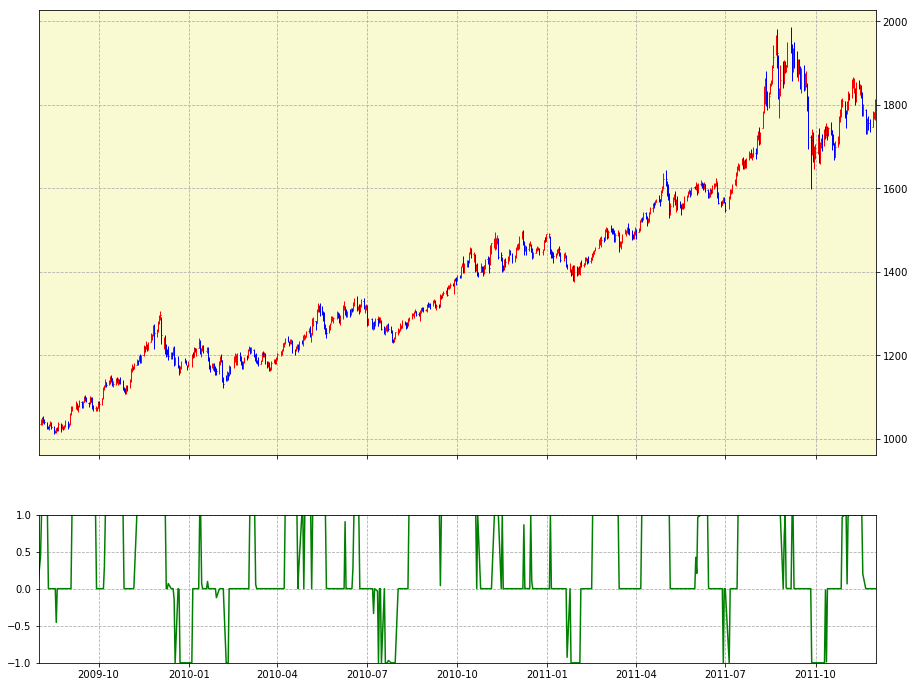

In [8]:
f, (ax) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize=(15,12), sharex='all')

ax[0] = ohlc_chart(ax[0], df, colors=['red','blue'])
ax[1].plot(df.trend, color='green')
#ax[1].plot(df.signal, color='red')
ax[1].set_ylim(-1,1)
ax[1].grid(linestyle='--')


start = np.datetime64('2009-08-01')
end = np.datetime64('2011-12-01')

ax[0].set_xlim(start,end)
ax[0].set_ylim(df.loc[start:end].low.min()*0.95, df.loc[start:end].high.max()*1.02)